In [1]:
import os
import sys
print(os.getcwd())
sys.path.append("../WanPy")

from WanPy import *
from pythtb import *
from pythTB_wan import Bloch, K_mesh, Wannier, Lattice
import models
import plotting as plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

/Users/treycole/Codes/WanPy/top_obstruction


In [2]:
# tight-binding parameters
delta = 1
# # checkerboard
# t0 = 0.4
# tprime = 0.5
# Haldane
t = 1
t2 = -0.4

n_super_cell = 2
model = models.Haldane(delta, t, t2).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
# model = models.chessboard(t0, tprime, delta).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
# model.display()

In [3]:
low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
high_E_sites = np.arange(1, model.get_num_orbitals(), 2)
lat_vecs = model.get_lat()
orb_vecs = model.get_orb()

n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)

print(f"Low energy sites: {low_E_sites}")
print(f"High energy sites: {high_E_sites}")
print(f"Chern # occupied: {chern: .1f}")

Low energy sites: [0 2 4 6]
High energy sites: [1 3 5 7]
Chern # occupied:  1.0


In [4]:
# only one should be true
random = False
low_E = False
omit = True

if random:
    omit_num = 2
    n_tfs = n_occ - omit_num
    tf_list = ["random", n_tfs]
elif omit:
    omit_sites = 2
    tf_list = list(np.setdiff1d(low_E_sites, [omit_sites])) # delta on lower energy sites omitting the last site
    # np.random.choice(low_E_sites, n_tfs, replace=False)
    n_tfs = len(tf_list)
elif low_E:
    tf_list = list(low_E_sites)
    n_tfs = len(tf_list)

Wan_frac = n_tfs/n_occ
print(f"Trial wavefunctions: {tf_list}")
print(f"# of Wannier functions: {n_tfs}")
print(f"# of occupied bands: {n_occ}")
print(f"Wannier fraction: {Wan_frac}")

Trial wavefunctions: [np.int64(0), np.int64(4), np.int64(6)]
# of Wannier functions: 3
# of occupied bands: 4
Wannier fraction: 0.75


In [5]:
nks = 20, 20
WF = Wannier(model, nks)
loc_steps = {}

In [6]:
WF.single_shot(tf_list)
WF.report()
loc_steps["P"] = {"Omega": WF.spread, "Omega_i": WF.omega_i, "Omega_til": WF.omega_til, "centers": WF.get_centers()}

Wannier function report
 --------------------- 
Quadratic spreads:
w_0 --> 0.27158
w_1 --> 0.27158
w_2 --> 0.27158
Centers:
w_0 --> [0.16514 0.16743]
w_1 --> [0.66743 0.16743]
w_2 --> [0.66743 0.66514]
Omega_i = 0.7388768356161961
Omega_tilde = 0.07587061897672932


In [7]:
# idx=0
# fig, ax = WF.plot_density(
#     idx, mark_center=True, scatter_size=100, 
#     lat_size=2, show_lattice=True, interpolate=True, return_fig=True)

# ax.set_xlim(-12, 12)
# ax.set_ylim(-12, 12)

In [8]:
iter_num = 20000
WF.subspace_selec(iter_num=iter_num, tol=1e-6, verbose=True)
loc_steps["PS"] = {
    "Omega": WF.spread, "Omega_i": WF.omega_i, "Omega_til": WF.omega_til,
    "centers": WF.get_centers(), "iter_num": iter_num}

0 Omega_I: 0.7351242262300665
1 Omega_I: 0.7318708508835965
2 Omega_I: 0.7290033204981776
3 Omega_I: 0.7264422430421242
4 Omega_I: 0.7241292655801946
5 Omega_I: 0.7220202214129731
6 Omega_I: 0.7200809965885955
7 Omega_I: 0.7182848310727413
8 Omega_I: 0.7166104648979814
9 Omega_I: 0.7150408208065461
10 Omega_I: 0.7135620454356507
11 Omega_I: 0.7121627987871694
12 Omega_I: 0.710833720078438
13 Omega_I: 0.7095670213309504
14 Omega_I: 0.7083561748922711
15 Omega_I: 0.7071956709131162
16 Omega_I: 0.7060808274938528
17 Omega_I: 0.7050076408723058
18 Omega_I: 0.7039726663213508
19 Omega_I: 0.7029729227918431
20 Omega_I: 0.7020058160559185
21 Omega_I: 0.7010690763684206
22 Omega_I: 0.7001607075986626
23 Omega_I: 0.6992789454844269
24 Omega_I: 0.6984222231853814
25 Omega_I: 0.6975891427126105
26 Omega_I: 0.6967784511152169
27 Omega_I: 0.6959890205392719
28 Omega_I: 0.6952198314554059
29 Omega_I: 0.6944699584920356
30 Omega_I: 0.6937385584216872
31 Omega_I: 0.6930248599344578
32 Omega_I: 0.69232

In [9]:
psi_til_til = WF.get_psi_tilde(
        WF.tilde_states._psi_wfs, WF.trial_wfs, 
        state_idx=list(range(WF.tilde_states._psi_wfs.shape[2]))
        )

WF.set_tilde_states(psi_til_til, cell_periodic=False)
WF.report()

loc_steps["PSP"] = {"Omega": WF.spread, "Omega_i": WF.omega_i, "Omega_til": WF.omega_til, "centers": WF.get_centers()}

Wannier function report
 --------------------- 
Quadratic spreads:
w_0 --> 0.23527
w_1 --> 0.23527
w_2 --> 0.23527
Centers:
w_0 --> [0.1801  0.15995]
w_1 --> [0.65995 0.15995]
w_2 --> [0.65995 0.6801 ]
Omega_i = 0.65779888421838
Omega_tilde = 0.048019131805558744


In [13]:
iter_num = 20000
WF.max_loc(eps=1e-3, iter_num=iter_num, tol=1e-6, grad_min=1e-8, verbose=True)

loc_steps["PSPM"] = {
    "Omega": WF.spread, "Omega_i": WF.omega_i, "Omega_til": WF.omega_til,
    "centers": WF.get_centers(), "iter_num": iter_num}

0 Omega_til = 0.044590884898169716, Grad mag: 0.0009918007253658732
1 Omega_til = 0.04459088489814668, Grad mag: 0.0009860868808304793
2 Omega_til = 0.04459088489807756, Grad mag: 0.000980405976367026
3 Omega_til = 0.044590884898100605, Grad mag: 0.0009747578219025367
4 Omega_til = 0.04459088489803149, Grad mag: 0.0009691422285865629
5 Omega_til = 0.04459088489798541, Grad mag: 0.0009635590084489437
6 Omega_til = 0.044590884897962375, Grad mag: 0.0009580079747748598
7 Omega_til = 0.044590884897962375, Grad mag: 0.0009524889419016583
8 Omega_til = 0.04459088489787023, Grad mag: 0.0009470017251696455
9 Omega_til = 0.044590884897824146, Grad mag: 0.0009415461409870859
10 Omega_til = 0.04459088489784719, Grad mag: 0.0009361220069754343
11 Omega_til = 0.044590884897824146, Grad mag: 0.0009307291415816701
12 Omega_til = 0.04459088489777807, Grad mag: 0.0009253673644664307
13 Omega_til = 0.044590884897732, Grad mag: 0.0009200364963111337
14 Omega_til = 0.044590884897755034, Grad mag: 0.000914

In [14]:
loc_steps

{'P': {'Omega': array([0.27158248, 0.27158248, 0.27158248]),
  'Omega_i': np.float64(0.7388768356161961),
  'Omega_til': np.float64(0.07587061897672932),
  'centers': array([[0.16513876, 0.16743062],
         [0.66743062, 0.16743062],
         [0.66743062, 0.66513876]])},
 'PS': {'Omega': array([215.73847845, 180.38421595, 214.4748608 ]),
  'Omega_i': np.float64(0.65779888421838),
  'Omega_til': np.float64(609.9397563138873),
  'centers': array([[-0.33333333,  0.01666667],
         [ 0.28333333, -0.11666667],
         [ 0.5       , -0.2       ]]),
  'iter_num': 20000},
 'PSP': {'Omega': array([0.23527267, 0.23527267, 0.23527267]),
  'Omega_i': np.float64(0.65779888421838),
  'Omega_til': np.float64(0.048019131805558744),
  'centers': array([[0.18010068, 0.15994966],
         [0.65994966, 0.15994966],
         [0.65994966, 0.68010068]])},
 'PSPM': {'Omega': array([0.23412992, 0.23412992, 0.23412992]),
  'Omega_i': np.float64(0.657798884224718),
  'Omega_til': np.float64(0.04459088489501

In [16]:
model_str = f'C={chern:.1f}_Delta={delta}_t={t}_t2={t2}'

if random:
    save_sfx = model_str + f'_tfxs={tf_list}'
else:
    save_sfx = model_str + f'_tfx={np.array(tf_list, dtype=int)}'

sv_dir = 'data'
if not os.path.exists(sv_dir):
    os.makedirs(sv_dir)

sv_prefix = 'WF_loc_steps'

file_name = f"{sv_dir}/{sv_prefix}_{save_sfx}"
file_name

'data/WF_loc_steps_C=1.0_Delta=1_t=1_t2=-0.4_tfx=[0 4 6]'

In [17]:
np.save(file_name, loc_steps)

(-12.0, 12.0)

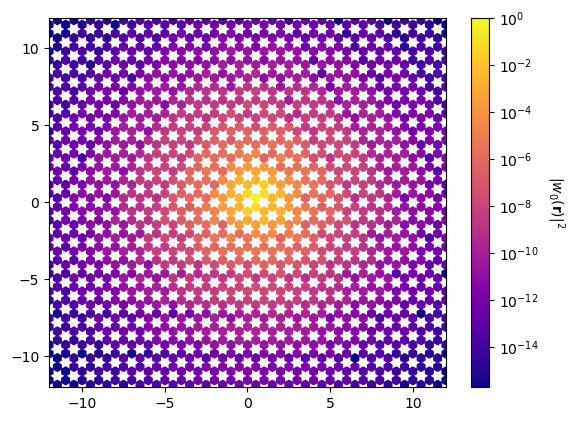

In [25]:
idx = 0
title = (
  "Haldane model \n"
  fr"$C = {chern: .1f}$, $\Delta = {delta}$, $t= {t: .2f}, t_2 = {t2: .2f}$"
  )

fig, ax = WF.plot_density(
    idx, show_lattice=False, lat_size=2, cbar=True, return_fig=True, interpolate=False
    )

ax.set_xlim(-12, 12)
ax.set_ylim(-12, 12)